# Bikram Mann

# 10 May 2021

# Capstone Project

# Predicting the Euro 2021 Winner

In [1]:
import requests

In [2]:
import os
os.getcwd()

'C:\\Users\\User\\Downloads\\Capstone'

In [3]:
os.chdir('C:\\Users\\User\\Downloads\\Capstone')

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Data Cleaning and Preparation

In [5]:
EurosTeams = pd.read_csv('Euros_teams.csv')

In [6]:
EurosTeams.dtypes

team_name                     object
common_name                   object
season                         int64
country                       object
matches_played                 int64
                               ...  
draw_percentage_away           int64
loss_percentage_ovearll        int64
loss_percentage_home           int64
loss_percentage_away           int64
over145_corners_percentage     int64
Length: 293, dtype: object

In [7]:
coefficients = pd.read_csv('country_coefficients.csv')

In [8]:
coefficients.head(25)

,country,coefficient
0,Belgium,1783.38
1,France,1757.30
2,England,1686.78
3,Portugal,1666.12
4,Spain,1648.13
5,Italy,1642.06
6,Denmark,1631.55
7,Germany,1609.12
8,Switzerland,1606.21
9,Croatia,1605.75


In [9]:
Euros_games = pd.read_csv('uefa-euro-2020-games.csv')

In [10]:
Euros_games.head(36)

,Round Number,Date,Location,Home Team,Away Team,Group,Result
0,1.0,11/06/2021 21:00,Olimpico in Rome,Turkey,Italy,Group A,NaN
1,1.0,12/06/2021 15:00,Baki Olimpiya Stadionu,Wales,Switzerland,Group A,NaN
2,1.0,12/06/2021 18:00,Parken,Denmark,Finland,Group B,NaN
3,1.0,12/06/2021 21:00,Saint Petersburg Stadium,Belgium,Russia,Group B,NaN
4,1.0,13/06/2021 15:00,Wembley Stadium,England,Croatia,Group D,NaN
5,1.0,13/06/2021 18:00,Arena Nationala,Austria,North Macedonia,Group C,NaN
6,1.0,13/06/2021 21:00,Johan Cruijff ArenA,Netherlands,Ukraine,Group C,NaN
7,1.0,14/06/2021 15:00,Hampden Park,Scotland,Czech Republic,Group D,NaN
8,1.0,14/06/2021 18:00,Saint Petersburg Stadium,Poland,Slovakia,Group E,NaN
9,1.0,14/06/2021 21:00,Estadio La Cartuja,Spain,Sweden,Group E,NaN


In [11]:
Results = pd.read_csv('results.csv')
Results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42079,2021-03-31,Andorra,Hungary,1,4,FIFA World Cup qualification,Andorra la Vella,Andorra,False
42080,2021-03-31,San Marino,Albania,0,2,FIFA World Cup qualification,Serravalle,San Marino,False
42081,2021-03-31,Armenia,Romania,3,2,FIFA World Cup qualification,Yerevan,Armenia,False
42082,2021-03-31,Germany,North Macedonia,1,2,FIFA World Cup qualification,Duisburg,Germany,False


In [12]:
Results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

Now let's check for duplicated values on all four dataframes

In [13]:
EurosTeams[EurosTeams.duplicated()]

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage


In [14]:
coefficients[coefficients.duplicated()]

,country,coefficient


In [15]:
Euros_games[Euros_games.duplicated()]

,Round Number,Date,Location,Home Team,Away Team,Group,Result
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
Results[Results.duplicated()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral


Now we should drop all the null values in Euros_games

In [17]:
Euros_games.isnull().sum()

Round Number    15
Date            15
Location        15
Home Team       15
Away Team       15
Group           15
Result          51
dtype: int64

In [18]:
Euros_games.shape

(51, 7)

In [19]:
Euros_games.dropna(how = 'all')

,Round Number,Date,Location,Home Team,Away Team,Group,Result
0,1.0,11/06/2021 21:00,Olimpico in Rome,Turkey,Italy,Group A,NaN
1,1.0,12/06/2021 15:00,Baki Olimpiya Stadionu,Wales,Switzerland,Group A,NaN
2,1.0,12/06/2021 18:00,Parken,Denmark,Finland,Group B,NaN
3,1.0,12/06/2021 21:00,Saint Petersburg Stadium,Belgium,Russia,Group B,NaN
4,1.0,13/06/2021 15:00,Wembley Stadium,England,Croatia,Group D,NaN
5,1.0,13/06/2021 18:00,Arena Nationala,Austria,North Macedonia,Group C,NaN
6,1.0,13/06/2021 21:00,Johan Cruijff ArenA,Netherlands,Ukraine,Group C,NaN
7,1.0,14/06/2021 15:00,Hampden Park,Scotland,Czech Republic,Group D,NaN
8,1.0,14/06/2021 18:00,Saint Petersburg Stadium,Poland,Slovakia,Group E,NaN
9,1.0,14/06/2021 21:00,Estadio La Cartuja,Spain,Sweden,Group E,NaN


### Exploritory Data Analysis

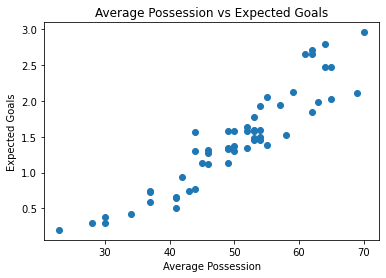

In [20]:
plt.scatter(EurosTeams['average_possession'], EurosTeams['xg_for_avg_overall'])
plt.title('Average Possession vs Expected Goals')
plt.ylabel('Expected Goals')
plt.xlabel('Average Possession')
plt.show()

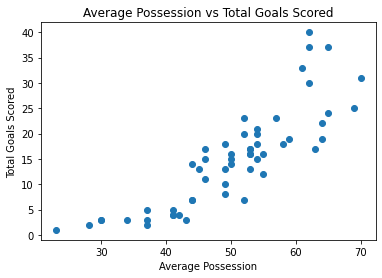

In [21]:
plt.scatter(EurosTeams['average_possession'], EurosTeams['goals_scored'])
plt.title('Average Possession vs Total Goals Scored')
plt.xlabel('Average Possession')
plt.ylabel('Total Goals Scored')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


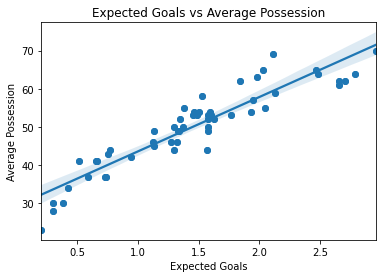

In [22]:
sns.regplot(EurosTeams['xg_for_avg_overall'], EurosTeams['average_possession'])
plt.scatter(EurosTeams['xg_for_avg_overall'], EurosTeams['average_possession'])
plt.title('Expected Goals vs Average Possession')
plt.xlabel('Expected Goals')
plt.ylabel('Average Possession')
plt.show()

xg_for_avg_overall - xg_against_avg_overall

the difference between these two values suggests how well the different teams are playing

In [24]:
EurosTeams['average_xg'] = EurosTeams['xg_for_avg_overall'] - EurosTeams['xg_against_avg_overall']
EurosTeams.head()

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage,average_xg
0,Finland National Team,Finland,2020,Finland,10,5,5,0,6,4,...,3,0,0,0,0,40,20,60,0,0.03
1,Iceland National Team,Iceland,2020,Iceland,12,6,6,0,7,5,...,2,4,8,0,17,33,17,50,8,0.11
2,Gibraltar National Team,Gibraltar,2020,Gibraltar,8,4,4,0,0,0,...,4,7,0,0,0,100,100,100,25,-2.60
3,Belarus National Team,Belarus,2020,Belarus,9,4,5,0,1,0,...,0,4,11,25,0,78,75,80,11,-0.85
4,Czech Republic National Team,Czech Republic,2020,Czech Republic,8,4,4,0,5,4,...,0,1,0,0,0,38,0,75,0,0.82


I will make a new category called 'overall performance', which is the expected goals difference times the points per game. Expected goals is the number of goals a team is expected to score or concede based on the quality of chances in a game

In [25]:
EurosTeams['overall_performance'] = EurosTeams['points_per_game'] * EurosTeams['average_xg'] 

In [26]:
EurosTeams.head()

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage,average_xg,overall_performance
0,Finland National Team,Finland,2020,Finland,10,5,5,0,6,4,...,0,0,0,0,40,20,60,0,0.03,0.0540
1,Iceland National Team,Iceland,2020,Iceland,12,6,6,0,7,5,...,4,8,0,17,33,17,50,8,0.11,0.2013
2,Gibraltar National Team,Gibraltar,2020,Gibraltar,8,4,4,0,0,0,...,7,0,0,0,100,100,100,25,-2.60,-0.0000
3,Belarus National Team,Belarus,2020,Belarus,9,4,5,0,1,0,...,4,11,25,0,78,75,80,11,-0.85,-0.3740
4,Czech Republic National Team,Czech Republic,2020,Czech Republic,8,4,4,0,5,4,...,1,0,0,0,38,0,75,0,0.82,1.5416


In [27]:
EurosTeams.sort_values('average_xg', ascending=False).head(5)

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage,average_xg,overall_performance
13,Spain National Team,Spain,2020,Spain,10,5,5,0,8,5,...,1,20,0,40,0,0,0,50,2.38,6.1880
15,Portugal National Team,Portugal,2020,Portugal,8,4,4,0,5,2,...,1,25,50,0,13,0,25,25,2.12,4.5156
36,Belgium National Team,Belgium,2020,Belgium,10,5,5,0,10,5,...,0,0,0,0,0,0,0,10,2.00,6.0000
54,Russia National Team,Russia,2020,Russia,10,5,5,0,8,4,...,1,0,0,0,20,20,20,20,1.98,4.7520
26,Germany National Team,Germany,2020,Germany,8,4,4,0,7,3,...,1,0,0,0,13,25,0,0,1.79,4.7077


The order of the top 5 for expected goal difference is Spain, Portugal, Belgium, Russia and Germany.

In [29]:
EurosTeams.sort_values('overall_performance', ascending=False).head(5)

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage,average_xg,overall_performance
13,Spain National Team,Spain,2020,Spain,10,5,5,0,8,5,...,1,20,0,40,0,0,0,50,2.38,6.1880
36,Belgium National Team,Belgium,2020,Belgium,10,5,5,0,10,5,...,0,0,0,0,0,0,0,10,2.00,6.0000
54,Russia National Team,Russia,2020,Russia,10,5,5,0,8,4,...,1,0,0,0,20,20,20,20,1.98,4.7520
34,Italy National Team,Italy,2020,Italy,10,5,5,0,10,5,...,0,0,0,0,0,0,0,10,1.57,4.7100
26,Germany National Team,Germany,2020,Germany,8,4,4,0,7,3,...,1,0,0,0,13,25,0,0,1.79,4.7077


The order of the top 5 for overall performance is Spain, Belgium, Russia, Italy and Germany

### Feature Engineering

In [30]:
coefficientjoin = coefficients.merge(EurosTeams, on = 'country', how = 'left')

In [31]:
coefficientjoin.head(10)

,country,coefficient,team_name,common_name,season,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,...,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage,average_xg,overall_performance
0,Belgium,1783.38,Belgium National Team,Belgium,2020,10,5,5,0,10,...,0,0,0,0,0,0,0,10,2.00,6.0000
1,France,1757.30,France National Team,France,2020,10,5,5,0,8,...,3,10,20,0,10,0,20,0,1.58,3.9500
2,England,1686.78,England National Team,England,2020,8,4,4,0,7,...,1,0,0,0,13,0,25,0,0.96,2.5248
3,Portugal,1666.12,Portugal National Team,Portugal,2020,8,4,4,0,5,...,1,25,50,0,13,0,25,25,2.12,4.5156
4,Spain,1648.13,Spain National Team,Spain,2020,10,5,5,0,8,...,1,20,0,40,0,0,0,50,2.38,6.1880
5,Italy,1642.06,Italy National Team,Italy,2020,10,5,5,0,10,...,0,0,0,0,0,0,0,10,1.57,4.7100
6,Denmark,1631.55,Denmark National Team,Denmark,2020,8,4,4,0,4,...,2,50,25,75,0,0,0,0,1.13,2.2600
7,Germany,1609.12,Germany National Team,Germany,2020,8,4,4,0,7,...,1,0,0,0,13,25,0,0,1.79,4.7077
8,Switzerland,1606.21,Switzerland National Team,Switzerland,2020,8,4,4,0,5,...,5,25,25,25,13,0,25,13,1.70,3.6210
9,Croatia,1605.75,Croatia National Team,Croatia,2020,8,4,4,0,5,...,0,25,0,50,13,0,25,25,1.10,2.3430


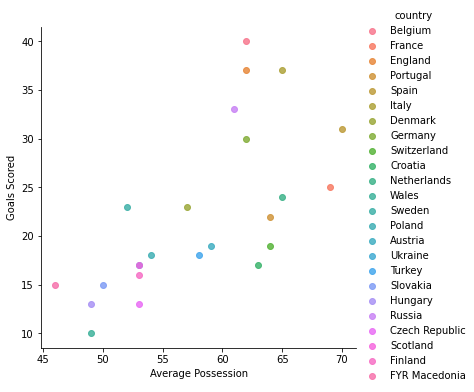

In [32]:
sns.lmplot(x='average_possession', y='goals_scored', hue = 'country', data=coefficientjoin)
plt.xlabel('Average Possession')
plt.ylabel('Goals Scored')
plt.show()

Now let's do some exploritory analysis on our historical dataset of international football results since 1870

In [33]:
Results = pd.read_csv('results.csv')
Results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Historical Results are not always accurate because the team that was historically better is not always better today. The way to correct this is through the UEFA coefficient. We will multiply the home score of each team by it's UEFA coefficient to further strengthen it's position relative to teams that are no longer that strong today

In [34]:
coefficientjoin['performance'] = coefficientjoin['coefficient'] * coefficientjoin['overall_performance']

In [35]:
coefficientjoin.head()

,country,coefficient,team_name,common_name,season,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,...,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage,average_xg,overall_performance,performance
0,Belgium,1783.38,Belgium National Team,Belgium,2020,10,5,5,0,10,...,0,0,0,0,0,0,10,2.00,6.0000,10700.280000
1,France,1757.30,France National Team,France,2020,10,5,5,0,8,...,10,20,0,10,0,20,0,1.58,3.9500,6941.335000
2,England,1686.78,England National Team,England,2020,8,4,4,0,7,...,0,0,0,13,0,25,0,0.96,2.5248,4258.782144
3,Portugal,1666.12,Portugal National Team,Portugal,2020,8,4,4,0,5,...,25,50,0,13,0,25,25,2.12,4.5156,7523.531472
4,Spain,1648.13,Spain National Team,Spain,2020,10,5,5,0,8,...,20,0,40,0,0,0,50,2.38,6.1880,10198.628440


In [36]:
country_performance = coefficientjoin.drop(coefficientjoin.columns.difference(['country','performance']), 1, inplace=False)

In [37]:
country_performance.sort_values('performance', ascending=False).head(24)

,country,performance
0,Belgium,10700.280000
4,Spain,10198.628440
5,Italy,7734.102600
7,Germany,7575.254224
3,Portugal,7523.531472
19,Russia,6950.512800
1,France,6941.335000
8,Switzerland,5816.086410
10,Netherlands,5096.469168
2,England,4258.782144


Now we will do some additional exploratory data analysis. First we will add 5000 to adjust the score so everyone is in the positive and to scale

In [38]:
country_performance['performance'] = country_performance['performance'] + 5000

In [39]:
country_performance.head(5)

,country,performance
0,Belgium,15700.280000
1,France,11941.335000
2,England,9258.782144
3,Portugal,12523.531472
4,Spain,15198.628440


In [40]:
country_performance.dtypes

country         object
performance    float64
dtype: object

In [41]:
country_performance['performance'] = country_performance['performance'] / 10000
country_performance.head(24)

,country,performance
0,Belgium,1.570028
1,France,1.194133
2,England,0.925878
3,Portugal,1.252353
4,Spain,1.519863
5,Italy,1.273410
6,Denmark,0.868730
7,Germany,1.257525
8,Switzerland,1.081609
9,Croatia,0.876227


In [42]:
country_performance['performance'] = country_performance['performance'].astype(int)
country_performance.head(24)

,country,performance
0,Belgium,1
1,France,1
2,England,0
3,Portugal,1
4,Spain,1
5,Italy,1
6,Denmark,0
7,Germany,1
8,Switzerland,1
9,Croatia,0


The teams with (1) beside them can be described as teams with exceptional performance in the group stage, whereas those with (0) beside them had average performance in the group stage. The countries with (1) beside them will have their historical statistics boosted.

Now we create a new column called 'home_team" which has the same values as country so we can do a join easier

In [43]:
country_performance['home_team'] = country_performance['country'] * 1
country_performance.head()

,country,performance,home_team
0,Belgium,1,Belgium
1,France,1,France
2,England,0,England
3,Portugal,1,Portugal
4,Spain,1,Spain


In [44]:
results = Results.merge(country_performance, on = 'home_team', how = 'left')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,country_y,performance
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Scotland,0.0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,0.0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,0.0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,England,0.0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42079,2021-03-31,Andorra,Hungary,1,4,FIFA World Cup qualification,Andorra la Vella,Andorra,False,NaN,NaN
42080,2021-03-31,San Marino,Albania,0,2,FIFA World Cup qualification,Serravalle,San Marino,False,NaN,NaN
42081,2021-03-31,Armenia,Romania,3,2,FIFA World Cup qualification,Yerevan,Armenia,False,NaN,NaN
42082,2021-03-31,Germany,North Macedonia,1,2,FIFA World Cup qualification,Duisburg,Germany,False,Germany,1.0


We must turn the fraction from an integer into a float, but before we do that, we must set all null-values equal to 1

In [45]:
results['performance'] = results['performance'].fillna(0)

In [46]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,country_y,performance
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Scotland,0.0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,0.0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,0.0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,England,0.0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42079,2021-03-31,Andorra,Hungary,1,4,FIFA World Cup qualification,Andorra la Vella,Andorra,False,NaN,0.0
42080,2021-03-31,San Marino,Albania,0,2,FIFA World Cup qualification,Serravalle,San Marino,False,NaN,0.0
42081,2021-03-31,Armenia,Romania,3,2,FIFA World Cup qualification,Yerevan,Armenia,False,NaN,0.0
42082,2021-03-31,Germany,North Macedonia,1,2,FIFA World Cup qualification,Duisburg,Germany,False,Germany,1.0


In [47]:
results.dtypes

date            object
home_team       object
away_team       object
home_score       int64
away_score       int64
tournament      object
city            object
country_x       object
neutral           bool
country_y       object
performance    float64
dtype: object

Now we can convert this column into an integer

In [48]:
results['performance'] = results['performance'].astype(int)
results

,date,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,country_y,performance
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Scotland,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,England,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,0
...,...,...,...,...,...,...,...,...,...,...,...
42079,2021-03-31,Andorra,Hungary,1,4,FIFA World Cup qualification,Andorra la Vella,Andorra,False,NaN,0
42080,2021-03-31,San Marino,Albania,0,2,FIFA World Cup qualification,Serravalle,San Marino,False,NaN,0
42081,2021-03-31,Armenia,Romania,3,2,FIFA World Cup qualification,Yerevan,Armenia,False,NaN,0
42082,2021-03-31,Germany,North Macedonia,1,2,FIFA World Cup qualification,Duisburg,Germany,False,Germany,1


Now we boost the historical performances of the high-performing countries at the qualifiers

In [49]:
results['home_score_new'] = results['home_score'] + results['performance']

In [50]:
results.dtypes

date              object
home_team         object
away_team         object
home_score         int64
away_score         int64
tournament        object
city              object
country_x         object
neutral             bool
country_y         object
performance        int32
home_score_new     int64
dtype: object

now we must compare the goals scored by the home vs away team to establish a winner for every game

In [51]:
winner = []
for i in range (len(results['home_score_new'])):
    if results['home_score_new'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score_new'][i] < results['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Tie')
results['winning_team'] = winner

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,country_y,performance,home_score_new,winning_team
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Scotland,0,0,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,0,4,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,0,2,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,England,0,2,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,0,3,Scotland


Another thing we can do is add a goal difference column in order to give every win and loss more context

In [52]:
results['goal_dif'] = np.absolute(results['home_score_new'] - results['away_score'])
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,country_y,performance,home_score_new,winning_team,goal_dif
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Scotland,0,0,Tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,0,4,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,0,2,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,England,0,2,Tie,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,0,3,Scotland,3


In [53]:
df = results[(results['home_team'] == 'Belgium') | (results['away_team'] == 'Belgium')]
Belgium = df.iloc[:]
Belgium.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,country_y,performance,home_score_new,winning_team,goal_dif
163,1904-05-01,Belgium,France,3,3,Friendly,Brussels,Belgium,False,Belgium,1,4,Belgium,1
174,1905-04-30,Belgium,Netherlands,1,4,Friendly,Antwerp,Belgium,False,Belgium,1,2,Netherlands,2
175,1905-05-07,Belgium,France,7,0,Friendly,Brussels,Belgium,False,Belgium,1,8,Belgium,8
176,1905-05-14,Netherlands,Belgium,4,0,Friendly,Rotterdam,Netherlands,False,Netherlands,1,5,Netherlands,5
185,1906-04-22,France,Belgium,0,5,Friendly,Saint-Cloud,France,False,France,1,1,Belgium,4


For the sake of accuracy, we will only be looking at results post-1950 because that gives us a more accurate read on the 

In [54]:
year = []
for row in Belgium['date']:
    year.append(int(row[:4]))
Belgium['match_year']= year
Belgium_new = Belgium[Belgium.match_year > 1959]
Belgium_new.count()

date              519
home_team         519
away_team         519
home_score        519
away_score        519
tournament        519
city              519
country_x         519
neutral           519
country_y         409
performance       519
home_score_new    519
winning_team      519
goal_dif          519
match_year        519
dtype: int64

Let's visualize the results of certain teams like Belgium and Germany

<AxesSubplot:xlabel='Belgium_Results', ylabel='count'>

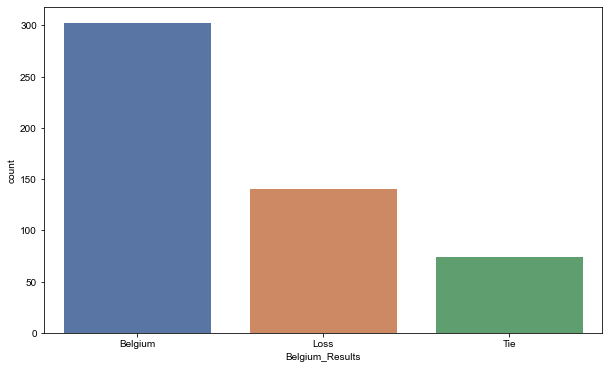

In [55]:
wins = []
for row in Belgium_new['winning_team']:
    if row != 'Belgium' and row != 'Tie':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'Belgium_Results'])

fig, ax = plt.subplots(1)
fig.set_size_inches(10, 6)
sns.set(style='darkgrid')
sns.countplot(x='Belgium_Results', data=winsdf)

In [56]:
df = results[(results['home_team'] == 'Germany') | (results['away_team'] == 'Germany')]
Germany = df.iloc[:]
Germany.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,country_y,performance,home_score_new,winning_team,goal_dif
213,1908-04-05,Switzerland,Germany,5,3,Friendly,Basel,Switzerland,False,Switzerland,1,6,Switzerland,3
220,1908-06-07,Austria,Germany,3,2,Friendly,Vienna,Austria,False,Austria,0,3,Austria,1
238,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,Germany,False,Germany,1,2,Germany,2
239,1909-04-04,Hungary,Germany,3,3,Friendly,Budapest,Hungary,False,Hungary,0,3,Tie,0
258,1910-04-03,Switzerland,Germany,2,3,Friendly,Basel,Switzerland,False,Switzerland,1,3,Tie,0


In [57]:
year = []
for row in Germany['date']:
    year.append(int(row[:4]))
Germany['match_year']= year
Germany_new = Germany[Germany.match_year > 1959]
Germany_new.count()

date              706
home_team         706
away_team         706
home_score        706
away_score        706
tournament        706
city              706
country_x         706
neutral           706
country_y         557
performance       706
home_score_new    706
winning_team      706
goal_dif          706
match_year        706
dtype: int64

<AxesSubplot:xlabel='Germany_Results', ylabel='count'>

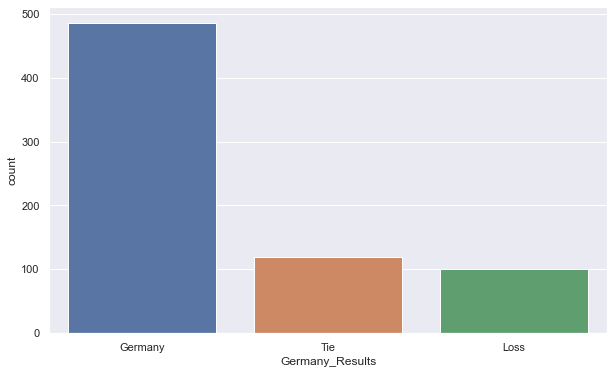

In [58]:
wins = []
for row in Germany_new['winning_team']:
    if row != 'Germany' and row != 'Tie':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'Germany_Results'])

fig, ax = plt.subplots(1)
fig.set_size_inches(10, 6)
sns.set(style='dark')
sns.countplot(x='Germany_Results', data=winsdf)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


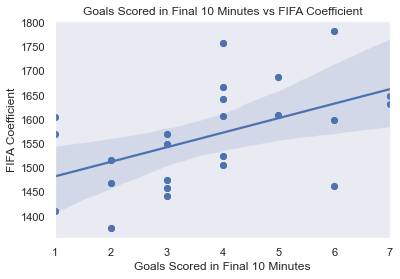

In [59]:
sns.regplot(coefficientjoin['goals_scored_min_81_to_90'], coefficientjoin['coefficient'])
plt.scatter(coefficientjoin['goals_scored_min_81_to_90'], coefficientjoin['coefficient'])
plt.title('Goals Scored in Final 10 Minutes vs FIFA Coefficient')
plt.xlabel('Goals Scored in Final 10 Minutes')
plt.ylabel('FIFA Coefficient')
plt.show()

#### Lets Analyse The Euros Teams

In [60]:
EuroTeamData = ['Belgium', ' France', 'England', 'Portugal', 'Spain', 'Italy', 'Denmark', 'Germany', 'Switzerland', 'Croatia', 'Netherlands', 'Wales', 
            'Sweden', 'Poland', 'Austria', 'Ukraine', 'Turkey', 'Slovakia', 'Hungary', 'Russia', 'Czech Republic', 'Scotland', 'Finland', 'FYR Macedonia']
Euros_teams_home = results[results['home_team'].isin(EuroTeamData)]
Euros_teams_away = results[results['away_team'].isin(EuroTeamData)]
Euros_teams = pd.concat((Euros_teams_home, Euros_teams_away))
Euros_teams.count()

date              15622
home_team         15622
away_team         15622
home_score        15622
away_score        15622
tournament        15622
city              15622
country_x         15622
neutral           15622
country_y         12076
performance       15622
home_score_new    15622
winning_team      15622
goal_dif          15622
dtype: int64

In [61]:
Euros_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,country_y,performance,home_score_new,winning_team,goal_dif
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Scotland,0,0,Tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,0,4,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,0,2,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,England,0,2,Tie,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,0,3,Scotland,3


#### More Data Cleaning

#### Building the model

In [62]:
year = []
for row in Euros_teams['date']:
    year.append(int(row[:4]))
Euros_teams['match_year'] = year
Euros_1960 = Euros_teams[Euros_teams.match_year > 1959]
Euros_1960.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country_x,neutral,country_y,performance,home_score_new,winning_team,goal_dif,match_year
4658,1960-01-06,Italy,Switzerland,3,0,International Cup,Naples,Italy,False,Italy,1,4,Italy,4,1960
4668,1960-02-28,Belgium,France,1,0,Friendly,Brussels,Belgium,False,Belgium,1,2,Belgium,2,1960
4675,1960-03-13,Spain,Italy,3,1,Friendly,Barcelona,Spain,False,Spain,1,4,Spain,3,1960
4682,1960-03-23,Germany,Chile,2,1,Friendly,Stuttgart,Germany,False,Germany,1,3,Germany,2,1960
4683,1960-03-27,Austria,France,2,4,UEFA Euro qualification,Vienna,Austria,False,Austria,0,2,France,2,1960


drop columns that are unimportant

In [63]:
Euros_1960 = Euros_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country_x', 'match_year', 'performance', 'match_year'], axis=1)
Euros_1960.head(30)

,home_team,away_team,neutral,country_y,home_score_new,winning_team,goal_dif
0,Scotland,England,False,Scotland,0,Tie,0
1,England,Scotland,False,England,4,England,2
2,Scotland,England,False,Scotland,2,Scotland,1
3,England,Scotland,False,England,2,Tie,0
4,Scotland,England,False,Scotland,3,Scotland,3
5,Scotland,Wales,False,Scotland,4,Scotland,4
6,England,Scotland,False,England,1,Scotland,2
7,Wales,Scotland,False,Wales,0,Scotland,2
8,Scotland,England,False,Scotland,7,Scotland,5
9,Scotland,Wales,False,Scotland,9,Scotland,9


In [64]:
Euros_teams.dtypes

date              object
home_team         object
away_team         object
home_score         int64
away_score         int64
tournament        object
city              object
country_x         object
neutral             bool
country_y         object
performance        int32
home_score_new     int64
winning_team      object
goal_dif           int64
match_year         int64
dtype: object

### Building the model

The winning_team column shows "2" if the home team won, "0" if the away team won, and "1" if it's a tie.

In [65]:
Euros_1960 = Euros_1960.reset_index(drop=True)
Euros_1960.loc[Euros_1960.winning_team == Euros_1960.home_team,'winning_team']=2
Euros_1960.loc[Euros_1960.winning_team == 'Tie', 'winning_team']=1
Euros_1960.loc[Euros_1960.winning_team == Euros_1960.away_team, 'winning_team']=0

Euros_1960.head()

,home_team,away_team,neutral,country_y,home_score_new,winning_team,goal_dif
0,Scotland,England,False,Scotland,0,1,0
1,England,Scotland,False,England,4,2,2
2,Scotland,England,False,Scotland,2,2,1
3,England,Scotland,False,England,2,1,0
4,Scotland,England,False,Scotland,3,2,3


In [66]:
Euro_predictor = Euros_1960.drop(['country_y', 'goal_dif', 'home_score_new'], axis=1)
Euro_predictor

,home_team,away_team,neutral,winning_team
0,Scotland,England,False,1
1,England,Scotland,False,2
2,Scotland,England,False,2
3,England,Scotland,False,1
4,Scotland,England,False,2
...,...,...,...,...
15617,Switzerland,Finland,False,2
15618,Lithuania,Italy,False,0
15619,Austria,Denmark,False,0
15620,England,Poland,False,2


In [67]:
Euro_predictor.dtypes

home_team       object
away_team       object
neutral           bool
winning_team    object
dtype: object

We need to convert home and away team from categorical variables to continous inputs, and we will do that with a dummy variable.

In [68]:
dummy = pd.get_dummies(Euro_predictor, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

In [69]:
X = dummy.drop(['winning_team'], axis=1)
y = dummy["winning_team"]
y = y.astype('int')

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70)

In [71]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
score1 = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

In [73]:
print("Training set accuracy: ", '%.4f'%(score1))
print("Test set accuracy: ", '%.4f'%(score2))

Training set accuracy:  0.6358
Test set accuracy:  0.6377


#### Deploying Model to Dataset

The two dataframes we will need now is cleanteamdata and Euros_games

Now in order for this to work, we must clean the data first. We do this by removing all non-groupstage data because we do not know what those games will be yet

In [74]:
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

In [75]:
Euros_games.insert(1, '1stposition', Euros_games['Home Team'].map(coefficients.set_index('country',verify_integrity= True)['coefficient']))
Euros_games.insert(2, '2ndposition', Euros_games['Away Team'].map(coefficients.set_index('country')['coefficient']))

In [76]:
Euros_games = Euros_games.iloc[:]
Euros_games.head(36)

,Round Number,1stposition,2ndposition,Date,Location,Home Team,Away Team,Group,Result
0,1.0,1505.05,1642.06,11/06/2021 21:00,Olimpico in Rome,Turkey,Italy,Group A,NaN
1,1.0,1570.36,1606.21,12/06/2021 15:00,Baki Olimpiya Stadionu,Wales,Switzerland,Group A,NaN
2,1.0,1631.55,1410.82,12/06/2021 18:00,Parken,Denmark,Finland,Group B,NaN
3,1.0,1783.38,1462.65,12/06/2021 21:00,Saint Petersburg Stadium,Belgium,Russia,Group B,NaN
4,1.0,1686.78,1605.75,13/06/2021 15:00,Wembley Stadium,England,Croatia,Group D,NaN
5,1.0,1523.42,NaN,13/06/2021 18:00,Arena Nationala,Austria,North Macedonia,Group C,NaN
6,1.0,1598.04,1515.85,13/06/2021 21:00,Johan Cruijff ArenA,Netherlands,Ukraine,Group C,NaN
7,1.0,1441.43,1458.81,14/06/2021 15:00,Hampden Park,Scotland,Czech Republic,Group D,NaN
8,1.0,1549.87,1475.24,14/06/2021 18:00,Saint Petersburg Stadium,Poland,Slovakia,Group E,NaN
9,1.0,1648.13,1569.81,14/06/2021 21:00,Estadio La Cartuja,Spain,Sweden,Group E,NaN


In [77]:
prediction_setup = []

for index, row in Euros_games.iterrows():
    if row['1stposition'] > row['2ndposition']:
        prediction_setup.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        prediction_setup.append({'home_team': row['Away Team'], 'away_team': row['Home Team'], 'winning_team': None})

prediction_setup = pd.DataFrame(prediction_setup)
backup = prediction_setup
prediction_setup.head()

,home_team,away_team,winning_team
0,Italy,Turkey,None
1,Switzerland,Wales,None
2,Denmark,Finland,None
3,Belgium,Russia,None
4,England,Croatia,None


Now I will set a dummy variable, drop the winning team column, add missing columns compared to the model's training dataset, and then remove the winning team column

In [ ]:
prediction_setup = pd.get_dummies(prediction_setup, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

In [79]:
blank_columns = set(dummy.columns) - set(prediction_setup.columns)
for c in blank_columns:
    prediction_setup[c] = 0
prediction_setup = prediction_setup[dummy.columns]

In [80]:
prediction_setup = prediction_setup.drop(['winning_team'], axis=1)
prediction_setup.head()

,neutral,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,...,away_team_Turkey,away_team_Ukraine,away_team_United Arab Emirates,away_team_United States,away_team_Uruguay,away_team_Uzbekistan,away_team_Venezuela,away_team_Wales,away_team_Yugoslavia,away_team_Zambia
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now it's time to run the script

In this case, the team with the lower chance of losing is given the win. Once I decide all the results in the group stages, I will create the knockout phase accordingly

In [88]:
for i in range(Euros_games.shape[0]):
    print('Odds of ' + backup.iloc[i, 0] + ' losing: ', '%.4f'%(logreg.predict_proba(prediction_setup)[i][0]))
    print('Odds of Tie: ', '%.4f'%(logreg.predict_proba(prediction_setup)[i][1]))
    print('Odds of ' + backup.iloc[i, 1] + ' losing: ', '%.4f'%(logreg.predict_proba(prediction_setup)[i][2]))
    print("")

Odds of Italy losing:  0.0158
Odds of Tie:  0.0620
Odds of Turkey losing:  0.9222

Odds of Switzerland losing:  0.0890
Odds of Tie:  0.1268
Odds of Wales losing:  0.7842

Odds of Denmark losing:  0.1186
Odds of Tie:  0.1656
Odds of Finland losing:  0.7157

Odds of Belgium losing:  0.2088
Odds of Tie:  0.1747
Odds of Russia losing:  0.6165

Odds of England losing:  0.2426
Odds of Tie:  0.3152
Odds of Croatia losing:  0.4423

Odds of North Macedonia losing:  0.6349
Odds of Tie:  0.1848
Odds of Austria losing:  0.1804

Odds of Netherlands losing:  0.0239
Odds of Tie:  0.1491
Odds of Ukraine losing:  0.8270

Odds of Czech Republic losing:  0.3558
Odds of Tie:  0.1553
Odds of Scotland losing:  0.4888

Odds of Poland losing:  0.2114
Odds of Tie:  0.2397
Odds of Slovakia losing:  0.5489

Odds of Spain losing:  0.0565
Odds of Tie:  0.0708
Odds of Sweden losing:  0.8727

Odds of Portugal losing:  0.0930
Odds of Tie:  0.0878
Odds of Hungary losing:  0.8192

Odds of France losing:  0.2156
Odds of

TypeError: can only concatenate str (not "float") to str

In [101]:
def ultimate_predictor(games, cleanteamdata, dummy, logreg):

    space = []
    for game in games:
        space.append(cleanteamdata.loc[country_performance['country'] == game[0],'performance'].iloc[0])
        space.append(cleanteamdata.loc[country_performance['country'] == game[1],'performance'].iloc[0])
    prediction_setup = []
    i = 0
    j = 0
    while i < len(space):
        dict1 = {}
        if space[i] < space[i + 1]:
            dict1.update({'home_team': games[j][1], 'away_team': games[j][0]})
        else:
            dict1.update({'home_team': games[j][0], 'away_team': games[j][1]})
        prediction_setup.append(dict1)
        i += 2
        j += 1
    prediction_setup = pd.DataFrame(prediction_setup)
    backup = prediction_setup
    prediction_setup = pd.get_dummies(prediction_setup, columns=['home_team', 'away_team'], prefix=['home_team', 'away_team'])

    blank_columns_2 = set(dummy.columns) - set(prediction_setup.columns)
    for c in blank_columns_2:
        prediction_setup[c] = 0
    prediction_setup = prediction_setup[dummy.columns]
    prediction_setup = prediction_setup.drop(['winning_team'], axis=1)
    
    for i in range(len(prediction_setup)):
        print('Odds of ' + backup.iloc[i, 0] + ' losing: ' , '%.4f'%(logreg.predict_proba(prediction_setup)[i][0]))
        print('Odds of Tie: ', '%.4f'%(logreg.predict_proba(prediction_setup)[i][1])) 
        print('Odds of ' + backup.iloc[i, 1] + ' losing: ', '%.4f'%(logreg.predict_proba(prediction_setup)[i][2]))
        print("")

Ro16 = [('Belgium', 'Switzerland'), ('Italy', 'Austria'), ('France', 'Russia'), ('Croatia', 'Sweden'), ('Spain', 'Czech Republic'), ('England', 'Portugal'),
        ('Netherlands', 'Germany'), ('Switzerland', 'Denmark')]
ultimate_predictor(Ro16, country_performance, dummy, logreg)

Odds of Belgium losing:  0.1049
Odds of Tie:  0.0931
Odds of Switzerland losing:  0.8020

Odds of Italy losing:  0.0250
Odds of Tie:  0.0730
Odds of Austria losing:  0.9020

Odds of France losing:  0.1358
Odds of Tie:  0.1588
Odds of Russia losing:  0.7054

Odds of Croatia losing:  0.2343
Odds of Tie:  0.2358
Odds of Sweden losing:  0.5298

Odds of Spain losing:  0.0536
Odds of Tie:  0.1146
Odds of Czech Republic losing:  0.8317

Odds of Portugal losing:  0.2021
Odds of Tie:  0.1651
Odds of England losing:  0.6329

Odds of Netherlands losing:  0.0807
Odds of Tie:  0.2979
Odds of Germany losing:  0.6214

Odds of Switzerland losing:  0.1369
Odds of Tie:  0.1543
Odds of Denmark losing:  0.7088



In [108]:
QuarterFinals = [('Belgium', 'Italy'), ('France', 'Croatia'), ('Spain', 'Portugal'), ('Netherlands', 'Denmark')]
ultimate_predictor(QuarterFinals, country_performance, dummy, logreg)

Odds of Belgium losing:  0.2476
Odds of Tie:  0.1794
Odds of Italy losing:  0.5730

Odds of France losing:  0.1635
Odds of Tie:  0.1745
Odds of Croatia losing:  0.6620

Odds of Spain losing:  0.0554
Odds of Tie:  0.0884
Odds of Portugal losing:  0.8562

Odds of Netherlands losing:  0.0358
Odds of Tie:  0.1377
Odds of Denmark losing:  0.8265



In [109]:
SemiFinals = [('Belgium', 'France'), ('Spain', 'Netherlands')]
ultimate_predictor(SemiFinals, country_performance, dummy, logreg)

Odds of Belgium losing:  0.2461
Odds of Tie:  0.1613
Odds of France losing:  0.5925

Odds of Spain losing:  0.0854
Odds of Tie:  0.0783
Odds of Netherlands losing:  0.8363



In [110]:
Final = [('Belgium', 'Spain')]
ultimate_predictor(Final, country_performance, dummy, logreg)

Odds of Belgium losing:  0.2754
Odds of Tie:  0.1808
Odds of Spain losing:  0.5438



### Clustering